In [1]:
# Importation of necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import 20 News Group dataset
# categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'misc.forsale', 'talk.politics.misc', 'talk.politics.guns', 'talk.politics.mideast', 'talk.religion.misc', 'alt.atheism', 'soc.religion.christian']

categories = ['comp.graphics']
# categories = ['comp.graphics', 'comp.os.ms-windows.misc']
# categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'] 
# categories = ['comp.windows.x', 'rec.autos'] 
# categories = ['rec.motorcycles', 'rec.sport.baseball'] 
# categories = ['rec.sport.hockey', 'sci.crypt'] 
# categories = ['sci.electronics', 'sci.med'] 
# categories = ['sci.space', 'misc.forsale'] 
# categories = ['talk.politics.misc', 'talk.politics.guns'] 
# categories = ['talk.politics.mideast', 'talk.religion.misc'] 
# categories = ['alt.atheism', 'soc.religion.christian']

main_dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'), categories=categories)
dataset = main_dataset.data
dataset_labels = main_dataset.target

In [7]:
# dataset

In [20]:
#Perform word-based ngram, stemming, stopword removal and term frequency count
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1, 1))
X = vectorizer.fit_transform(dataset)
# print(X)
# print(vectorizer.get_feature_names())

In [21]:
#Convert to vector space
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
print(X_tfidf.shape)
# print(X_tfidf)

(584, 10866)


In [22]:
#Retrieve 1000 features as done by the base work
X_tfidf_arr = X_tfidf.toarray()
X_tfidf_arr = X_tfidf_arr.tolist()
selected_features_list = []
n = 1000
for X_arr in X_tfidf_arr:
    X_arr.sort() 
    selected_features = X_arr[-n:]
    selected_features_list.append(selected_features)

selected_features_arr = np.array(selected_features_list)
print(selected_features_arr.shape)
print(selected_features_arr)

(584, 1000)
[[0.         0.         0.         ... 0.31262686 0.31262686 0.37357309]
 [0.         0.         0.         ... 0.26862644 0.28698109 0.54332336]
 [0.         0.         0.         ... 0.17724211 0.1937025  0.28010164]
 ...
 [0.         0.         0.         ... 0.21162742 0.26184655 0.31931719]
 [0.         0.         0.         ... 0.17909503 0.25584592 0.31112576]
 [0.         0.         0.         ... 0.23142843 0.26425504 0.39610886]]


In [13]:
print(type(selected_features_arr))

<class 'numpy.ndarray'>


In [25]:
# Dimensionality reduction with PCA
pca=PCA(.90)  
pca.fit(selected_features_arr)
no_of_components = pca.n_components_
print('Number of components to explain 90% Variance is',no_of_components)

Number of components to explain 90% Variance is 6


In [27]:
pca2 = PCA(no_of_components)
selected_features_arr2 = pca2.fit_transform(selected_features_arr)

In [28]:
selected_features_arr2

array([[-0.15604564,  0.11457052, -0.13978061,  0.00340629, -0.0940643 ,
         0.01740509],
       [-0.10137351,  0.26999537, -0.18336016, -0.03436428,  0.1932964 ,
        -0.01976536],
       [-0.3421057 ,  0.19747654, -0.05718213, -0.1975575 ,  0.0537408 ,
         0.0374402 ],
       ...,
       [-0.28913713,  0.13205905, -0.08752961, -0.04149021, -0.08200008,
         0.07638522],
       [-0.37159873,  0.19621596, -0.06291056, -0.05813106, -0.02229018,
         0.10037199],
       [-0.16112982,  0.01420954, -0.0803892 ,  0.04329908, -0.05395955,
         0.06893661]])

In [29]:
#Function to compute improved square cosine similarity measure
from numpy import dot
from numpy.linalg import norm
import math

def improved_sqrt_cos_sim(a, b):
    outter_isc_sim = []
    for i in a:
        inner_isc_sim = []
        for j in b:
            dot_ij = dot(i, j)
            if dot_ij < 0:
                dot_ij = 0
            numerator = math.sqrt(dot_ij)
            denominator = math.sqrt(norm(i))*math.sqrt(norm(j))
            
            if denominator == 0:
                isc_sim = 0
            else:
                isc_sim = numerator / denominator
                
            inner_isc_sim.append(isc_sim)
        outter_isc_sim.append(inner_isc_sim)
    return np.array(outter_isc_sim)

In [31]:
#Compute improved square cosine similarity measure
isc_similarities = improved_sqrt_cos_sim(selected_features_arr2, selected_features_arr2)
print(isc_similarities)
isc_similarities.shape

[[1.         0.72756928 0.82558024 ... 0.94980437 0.90493499 0.91712136]
 [0.72756928 1.         0.80432756 ... 0.68576458 0.74997167 0.5166517 ]
 [0.82558024 0.80432756 1.         ... 0.93040428 0.96147531 0.76188054]
 ...
 [0.94980437 0.68576458 0.93040428 ... 1.         0.98734305 0.9382726 ]
 [0.90493499 0.74997167 0.96147531 ... 0.98734305 1.         0.89983382]
 [0.91712136 0.5166517  0.76188054 ... 0.9382726  0.89983382 1.        ]]


(584, 584)

In [33]:
#Function to calculate purity score
def purity_score(y_true, y_pred):
    # matrix which will hold the majority-voted labels
    y_voted_labels = np.zeros(y_true.shape)
    # Ordering labels
    ## Labels might be missing e.g with set like 0,2 where 1 is missing
    ## First find the unique labels, then map the labels to an ordered set
    ## 0,2 should become 0,1
    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true==labels[k]] = ordered_labels[k]
    # Update unique labels
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that 
    # we count the actual occurence of classes between two consecutive bin
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner
    
    return accuracy_score(y_true, y_voted_labels)

Optimal k: 3


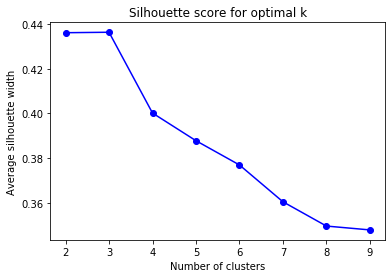

In [34]:
#Calculate silhouette for a range of number of cluster
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
from sklearn.metrics import silhouette_score

sil = []
K = range(2, 10)
for i in K:
    fcm = FCM(n_clusters=i)
    fcm.fit(isc_similarities)
    fcm_labels  = fcm.u.argmax(axis=1)
    sil.append(silhouette_score(isc_similarities, fcm_labels, metric = 'euclidean'))

# plot
K_list = list(K)
opt_k = K_list[sil.index(max(sil))]
print("Optimal k:", opt_k) 
plt.plot(K, sil, 'bx-', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette width')
plt.title('Silhouette score for optimal k')
plt.show()

In [35]:
no_of_clusters = 3

In [39]:
# fit the fuzzy-c-means
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

fcm = FCM(n_clusters=no_of_clusters)
fcm.fit(isc_similarities)

# outputs
fcm_memberships  = fcm.u
fcm_pred_labels  = fcm.u.argmax(axis=1)
fcm_centers = fcm.centers

In [40]:
#Get proposed system cluster accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(dataset_labels, fcm_pred_labels)

0.261986301369863

In [41]:
purity_score(dataset_labels, fcm_pred_labels)

1.0